In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math

In [3]:
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [4]:
df = pd.read_csv("data/train.csv")

print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum().sort_values(ascending=False).head(15))

target_cols = ['forward_returns', 'risk_free_rate', 'market_forward_excess_returns']
feature_cols = [col for col in df.columns if col not in target_cols]

   date_id  D1  D2  D3  D4  D5  D6  D7  D8  D9  ...  V3  V4  V5  V6  V7  V8  \
0        0   0   0   0   1   1   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
1        1   0   0   0   1   1   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
2        2   0   0   0   1   0   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
3        3   0   0   0   1   0   0   0   0   0  ... NaN NaN NaN NaN NaN NaN   
4        4   0   0   0   1   0   0   0   0   0  ... NaN NaN NaN NaN NaN NaN   

   V9  forward_returns  risk_free_rate  market_forward_excess_returns  
0 NaN        -0.002421        0.000301                      -0.003038  
1 NaN        -0.008495        0.000303                      -0.009114  
2 NaN        -0.009624        0.000301                      -0.010243  
3 NaN         0.004662        0.000299                       0.004046  
4 NaN        -0.011686        0.000299                      -0.012301  

[5 rows x 98 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990 entries, 0 to 8

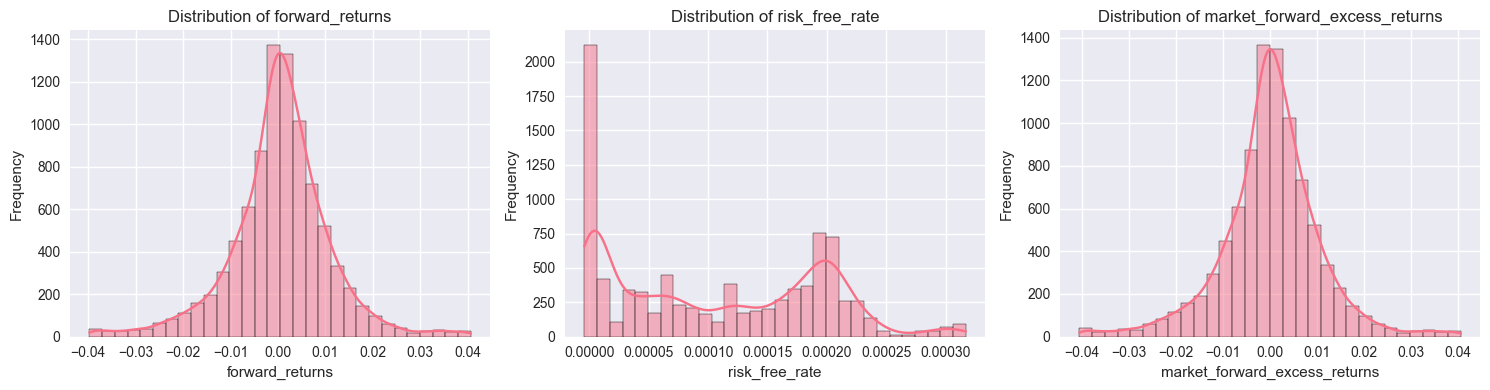

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(target_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [6]:
corr_lin = df.corr(numeric_only=True)[target_cols]
corr_lin_abs_sorted = corr_lin.abs().sort_values(by=target_cols, ascending=False)
print(corr_lin_abs_sorted.head(15))

                               forward_returns  risk_free_rate  \
forward_returns                       1.000000        0.001126   
market_forward_excess_returns         0.999957        0.009526   
M4                                    0.066591        0.001079   
V13                                   0.063071        0.048629   
M1                                    0.044979        0.217556   
S5                                    0.040562        0.056604   
S2                                    0.037465        0.045796   
D1                                    0.034180        0.001097   
D2                                    0.034180        0.001097   
M2                                    0.033464        0.021385   
V7                                    0.032736        0.099386   
E7                                    0.032192        0.054494   
V10                                   0.031712        0.202424   
E11                                   0.030796        0.174674   
E12       

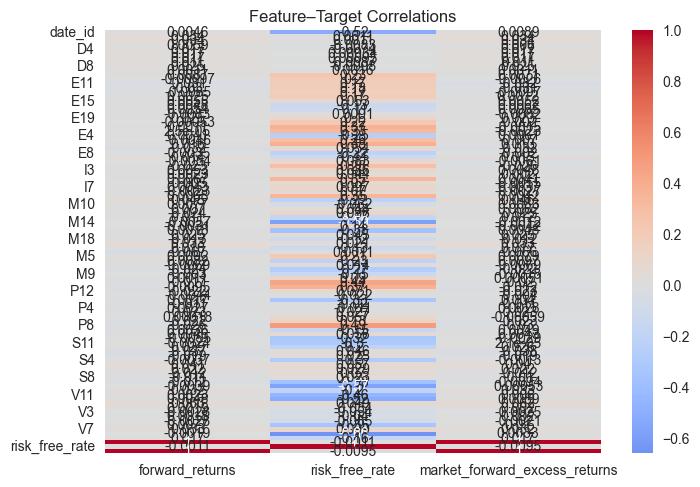

In [7]:
sns.heatmap(corr_lin, annot=True, cmap='coolwarm', center=0)
plt.title('Feature–Target Correlations')
plt.show()

In [8]:
corr_nl = df.corr(numeric_only=True, method='spearman')[target_cols]
corr_nl_abs_sorted = corr_nl.abs().sort_values(by=target_cols, ascending=False)
print(corr_nl_abs_sorted.head(15))

                               forward_returns  risk_free_rate  \
forward_returns                       1.000000        0.006276   
market_forward_excess_returns         0.999926        0.016431   
M4                                    0.052698        0.003440   
M1                                    0.051080        0.180199   
V13                                   0.046932        0.064681   
S2                                    0.044140        0.057611   
V10                                   0.042640        0.070759   
P5                                    0.041216        0.015859   
S5                                    0.039832        0.056468   
V7                                    0.038027        0.135173   
E19                                   0.035730        0.150942   
V9                                    0.031859        0.000655   
D1                                    0.030266        0.001964   
D2                                    0.030266        0.001964   
E11       

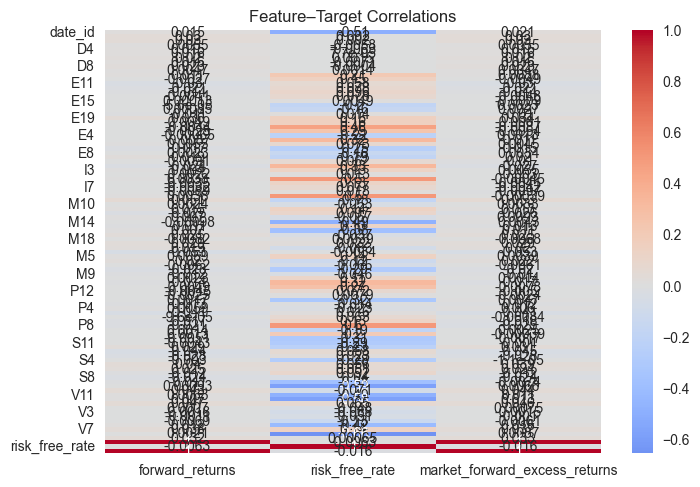

In [9]:
sns.heatmap(corr_nl, annot=True, cmap='coolwarm', center=0)
plt.title('Feature–Target Correlations')
plt.show()

In [10]:
corr_delta = corr_nl - corr_lin
sort_key = corr_delta[target_cols].abs().sum(axis=1)
corr_delta_abs_sorted = corr_delta.loc[sort_key.sort_values(ascending=False).index]
print(corr_delta_abs_sorted.head(15))

     forward_returns  risk_free_rate  market_forward_excess_returns
E7          0.015113       -0.305559                       0.017727
E6         -0.010147       -0.308593                      -0.008106
V9          0.015276        0.158052                       0.015994
I5         -0.002944        0.154365                      -0.004513
I9         -0.002999        0.153729                      -0.004557
V10         0.010928        0.131665                       0.010918
S1         -0.003369        0.145321                      -0.004727
M18         0.004557        0.119799                       0.005128
M6          0.011344        0.104197                       0.011974
E12         0.008791       -0.101596                       0.009353
E11         0.001036       -0.116775                       0.001788
P10         0.003043       -0.112272                       0.002840
M9         -0.008631        0.100869                      -0.008466
M13        -0.003602        0.110244            

Text(0.5, 1.0, 'Non-Linear vs Linear Correlation Differences')

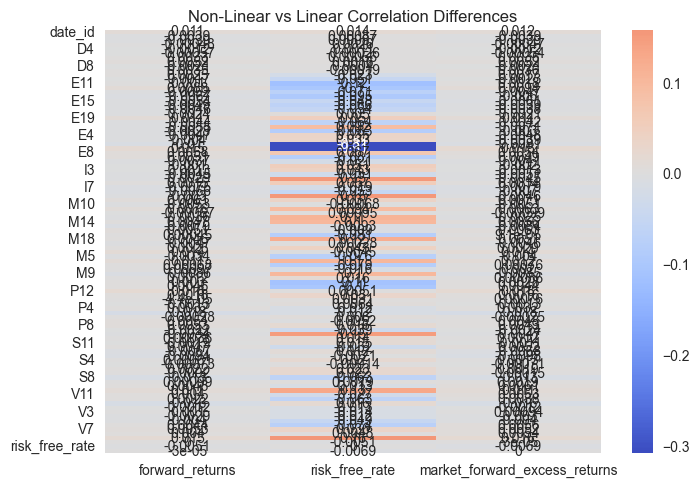

In [11]:
sns.heatmap(corr_delta, annot=True, cmap='coolwarm', center=0)
plt.title('Non-Linear vs Linear Correlation Differences')

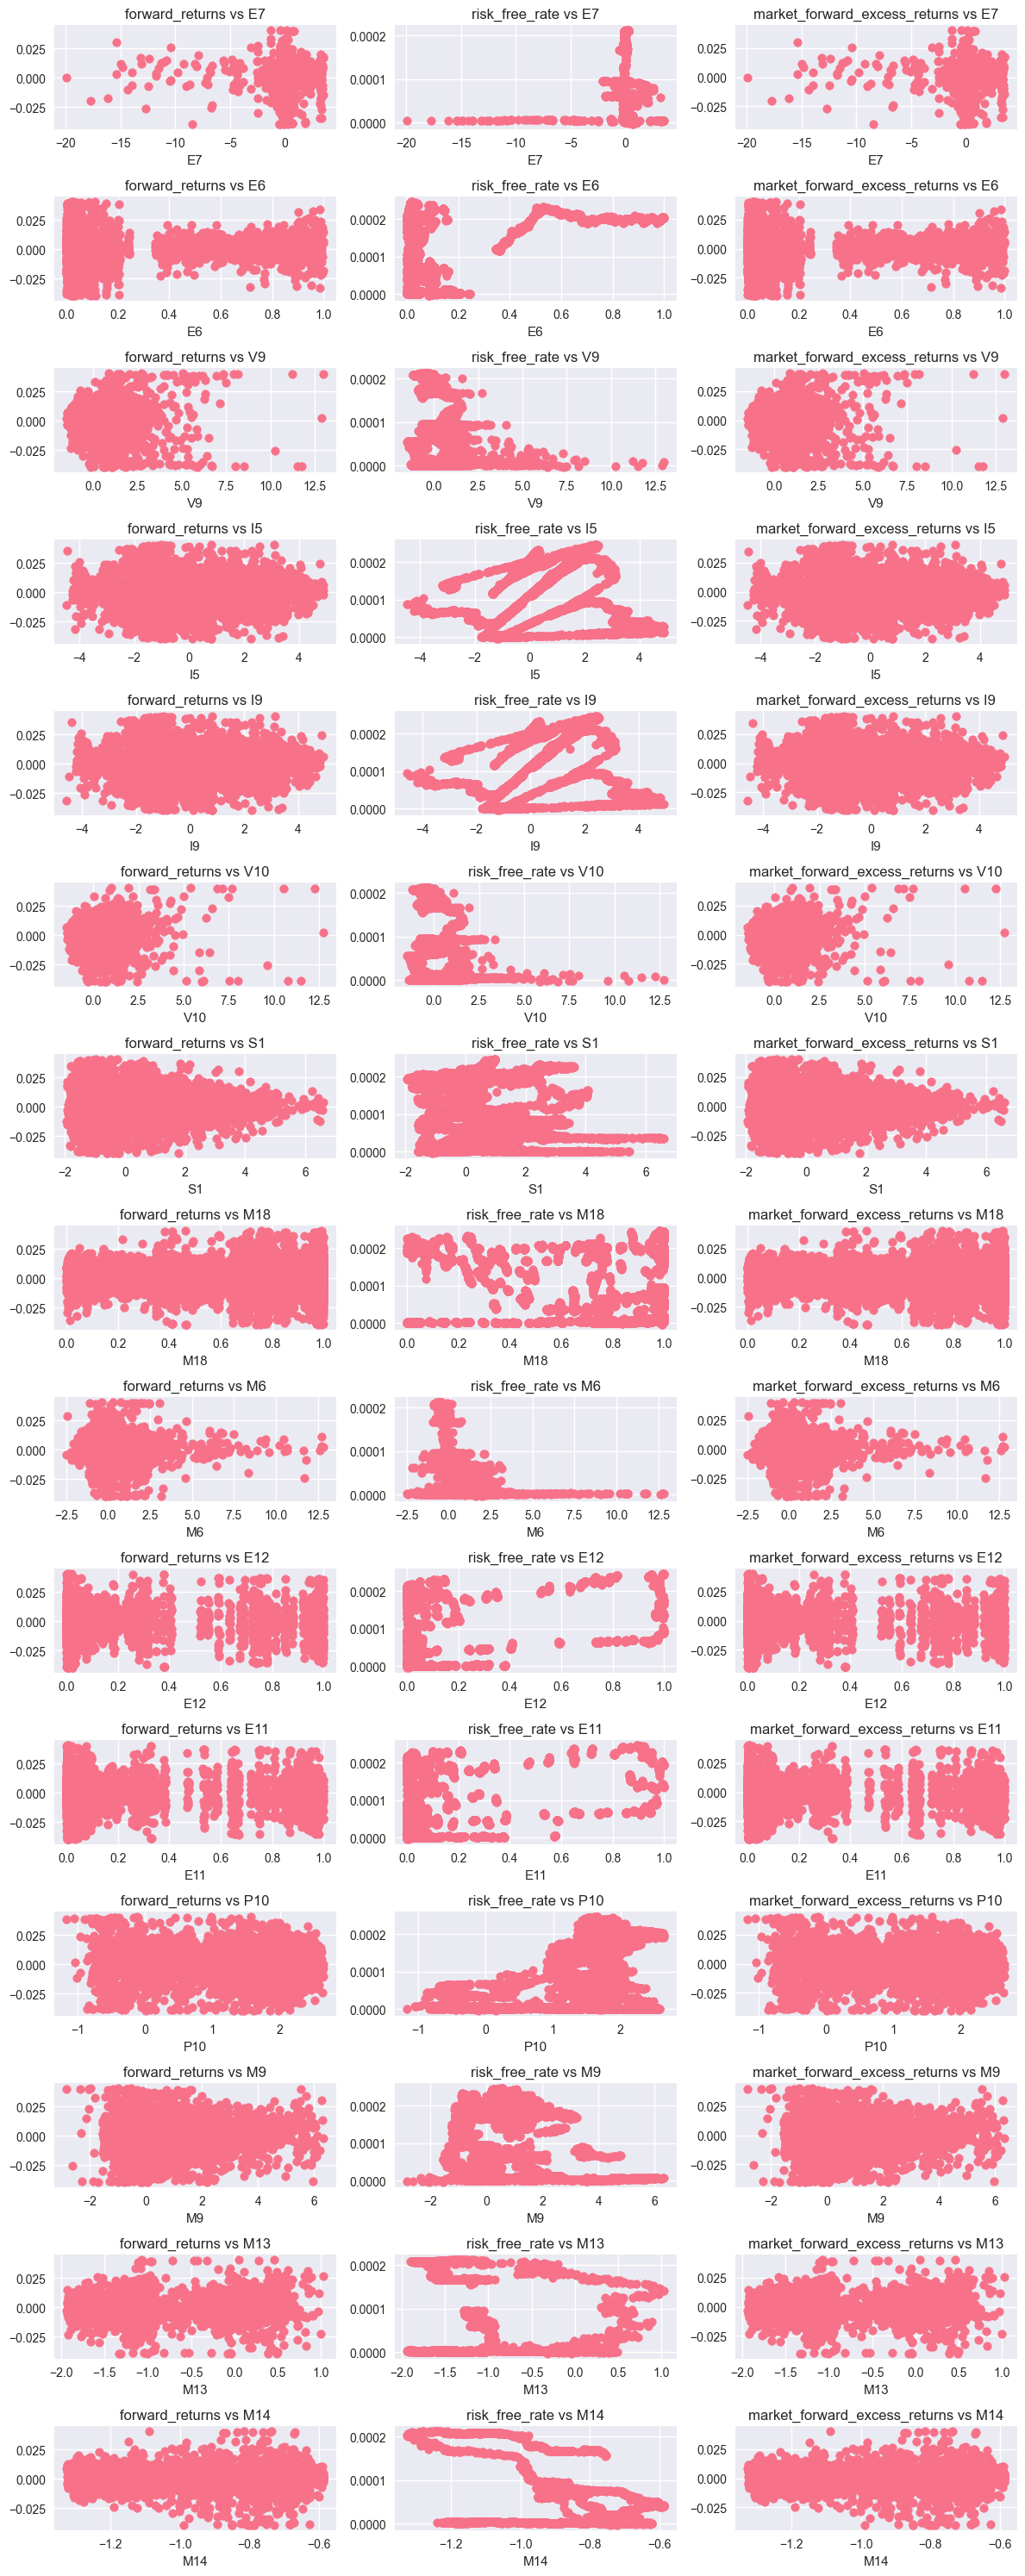

In [20]:
x_cols = corr_delta_abs_sorted.index[:15].tolist()

fig, axes = plt.subplots(nrows=15, ncols=3, figsize=(12, 30))

for i, x in enumerate(x_cols):
    for j, y in enumerate(target_cols):
        ax = axes[i, j]
        ax.scatter(df[x], df[y])
        ax.set_xlabel(x)
        ax.set_title(f"{y} vs {x}")

plt.tight_layout()
plt.show()


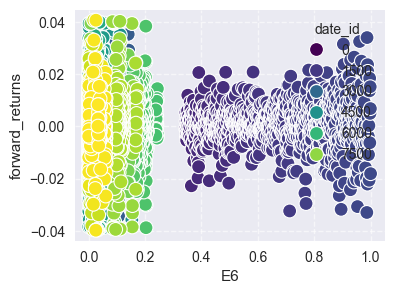

In [48]:
plt.figure(figsize=(4, 3))

sns.scatterplot(
    data=df,
    x='E6',
    y='forward_returns',
    hue='date_id',
    s=100,
    palette='viridis'
)

plt.xlabel('E6')
plt.ylabel('forward_returns')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()